In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd

# 替换为实际的文件路径
file_path = 'earthquakes-2024-11-06_14-23-51_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t')

# 显示前几行数据以确认读取成功
print(Sig_Eqs.head())

  Search Parameters    Year  Mo  Dy  Hr  Mn  Sec  Tsu     Vol  \
0                []     NaN NaN NaN NaN NaN  NaN  NaN     NaN   
1               NaN -2150.0 NaN NaN NaN NaN  NaN  NaN     NaN   
2               NaN -2000.0 NaN NaN NaN NaN  NaN  1.0     NaN   
3               NaN -2000.0 NaN NaN NaN NaN  NaN  NaN     NaN   
4               NaN -1610.0 NaN NaN NaN NaN  NaN  3.0  1351.0   

                       Location Name  ...  Total Missing  \
0                                NaN  ...            NaN   
1      JORDAN:  BAB-A-DARAA,AL-KARAK  ...            NaN   
2                     SYRIA:  UGARIT  ...            NaN   
3                   TURKMENISTAN:  W  ...            NaN   
4  GREECE:  THERA ISLAND (SANTORINI)  ...            NaN   

   Total Missing Description  Total Injuries  Total Injuries Description  \
0                        NaN             NaN                         NaN   
1                        NaN             NaN                         NaN   
2                   

In [55]:
# 按国家分组并计算总死亡人数
deaths_by_country = Sig_Eqs.groupby('Location Name')['Deaths'].sum().sort_values(ascending=False)

# 打印前20个国家及其总死亡人数
print(deaths_by_country.head(20))

Location Name
CHINA:  SHAANXI PROVINCE                     830313.0
TURKEY:  ANTAKYA (ANTIOCH)                   474870.0
HAITI:  PORT-AU-PRINCE                       316000.0
IRAN:  TABRIZ                                268750.0
TURKEY:  ANTAKYA (ANTIOCH), SAMANDAG         250000.0
CHINA:  NE:  TANGSHAN                        242769.0
AZERBAIJAN:  GYZNDZHA                        230000.0
IRAN:  DAMGHAN, QUMIS                        200000.0
CHINA:  GANSU PROVINCE, SHANXI PROVINCE      200000.0
ARMENIA:  DVIN; IRAN:  ARDABIL               150000.0
JAPAN:  TOKYO, YOKOHAMA                      142809.0
CHINA:  GANSU PROVINCE                       137682.0
SYRIA:  ALEPPO                               130000.0
IRAQ:  AL-MAWSIL                             120000.0
TURKMENISTAN:  ASHKHABAD                     110000.0
CHINA:  SICHUAN PROVINCE                     107213.0
CHINA:  NEI MONGOL:  NINGCHENG               100000.0
PORTUGAL:  LISBON                             83311.0
SYRIA:  HALAB 

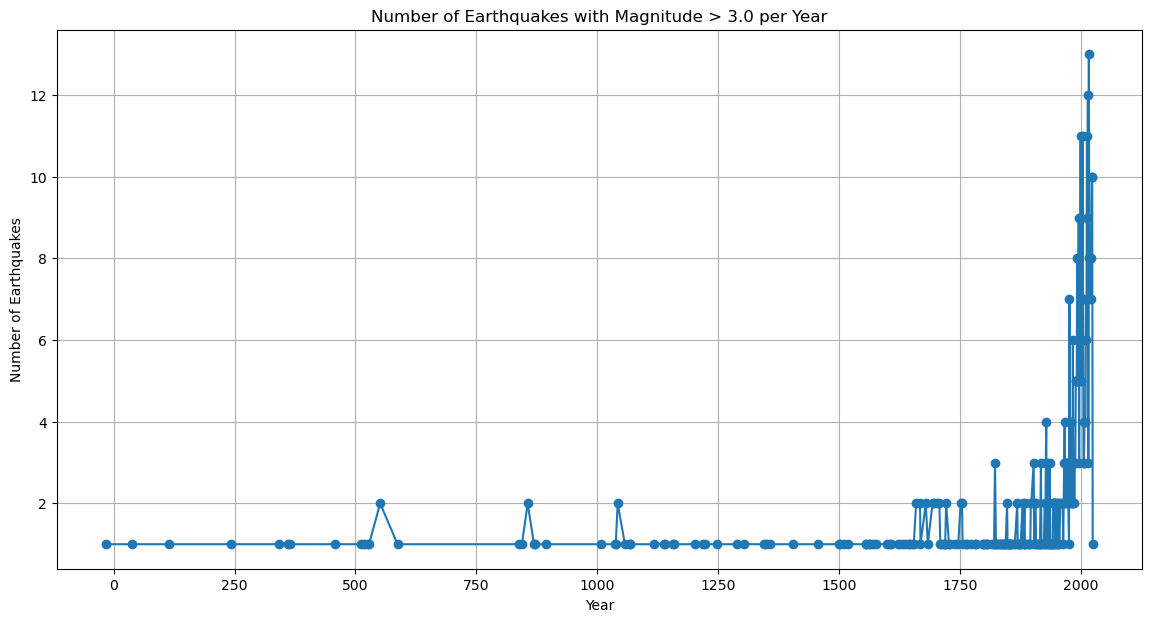

Trend Analysis:
There is no clear trend.


In [61]:
# 过滤震级大于3.0的地震
filtered_eqs = Sig_Eqs[Sig_Eqs['Damage Description'] > 3.0]

# 将年份列转换为整数类型
#filtered_eqs['Year'] = filtered_eqs['Year'].astype(int)

# 按年份分组并计算每年的地震数量
eqs_per_year = filtered_eqs.groupby('Year').size()

# 绘制时间序列图
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(eqs_per_year.index, eqs_per_year.values, marker='o')
plt.title('Number of Earthquakes with Magnitude > 3.0 per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# 分析趋势
print("Trend Analysis:")
if eqs_per_year.is_monotonic_increasing:
    print("There is a clear increasing trend.")
elif eqs_per_year.is_monotonic_decreasing:
    print("There is a clear decreasing trend.")
else:
    print("There is no clear trend.")

In [73]:
def CountEq_LargestEq(country):
    # 过滤数据以获取指定国家的地震记录
    country_data = Sig_Eqs[Sig_Eqs['Location Name'] == country]
    
    # 计算该国家的地震总数
    total_eqs = len(country_data)
    
    # 找到该国家的最大地震
    if not country_data.empty:
        largest_eq = country_data.loc[country_data['Damage Description'].idxmax()]
        largest_eq_date = largest_eq.get('Date', None)
        largest_eq_location = largest_eq.get('Location Name', None)
    else:
        largest_eq_date = None
        largest_eq_location = None
    
    return total_eqs, largest_eq_date, largest_eq_location

# 应用函数到每个国家并存储结果
results = []
for country in Sig_Eqs['Location Name'].unique():
    total_eqs, largest_eq_date, largest_eq_location = CountEq_LargestEq(country)
    results.append((country, total_eqs, largest_eq_date, largest_eq_location))

# 创建DataFrame来存储结果
results_df = pd.DataFrame(results, columns=['Location Name', 'Total Earthquakes', 'Largest Earthquake Date', 'Largest Earthquake Location'])

# 按地震总数降序排列结果
results_df = results_df.sort_values(by='Total Earthquakes', ascending=False)

# 打印结果
print(results_df)

C:\Users\28744\AppData\Local\Temp\ipykernel_24524\3531034540.py:10: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  largest_eq = country_data.loc[country_data['Damage Description'].idxmax()]


KeyError: nan